In [15]:
from __future__ import print_function
import logging
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
import torch.nn.functional as F
from PIL import Image
import torch.optim as optim
import os
from os import listdir
import random
import copy
from torch.utils.data import DataLoader
from skimage import measure #supports video also
import pickle
from scipy.spatial import distance
import time
import platform
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils.io import figure_save
import random
import math
import numpy as np
from PIL import Image
import copy
import logging
import time
from utils.io import imshow

from utils.Network import Network
from utils.Analyser import Analyser
from utils.io import save_network, save, load, figure_save, load_network, make_folder_results, imshow
from utils.format import hex_str2bool
from utils.WaveDataset import create_datasets

transformVar = {"Test": transforms.Compose([
    transforms.Resize(128),    #Already 184 x 184
    transforms.CenterCrop(128),
    transforms.ToTensor(),
#     normalize
]),
    "Train": transforms.Compose([
    transforms.Resize(128),  # Already 184 x 184
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
#     normalize
    ])
}

logging.basicConfig(format='%(message)s',level=logging.INFO)
channels=1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

nr_net = 0 

version = nr_net + 10
network_type = "7_kernel_3LSTM"

if 'Darwin' in platform.system():
    data_dir = './'
else:
    data_dir = '/disk/scratch/s1680171/wave_propagation/'

if not os.path.isdir("./Results"):
    os.mkdir("./Results")
results_dir = "./Results/" + network_type + "_v%03d/" % version

if not os.path.isdir(results_dir):
    make_folder_results(results_dir)
    
# Data
filename_data = results_dir + "all_data.pickle"
if os.path.isfile(filename_data):
    logging.info('Loading datasets')
    all_data = load(filename_data)
    train_dataset = all_data["Training data"]
    val_dataset = all_data["Validation data"]
    test_dataset = all_data["Testing data"]
else:
    logging.info('Creating new datasets')
    test_dataset, val_dataset, train_dataset = Create_Datasets(
         data_dir+"Video_Data/", transformVar, test_fraction=0.15, validation_fraction=0.15, check_bad_data=False, channels=channels)
    all_data = {"Training data": train_dataset, "Validation data": val_dataset, "Testing data": test_dataset}
    save(all_data, filename_data)

train_dataset.root_dir = './Video_Data/'
val_dataset.root_dir = './Video_Data/'
test_dataset.root_dir = './Video_Data/'

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=12)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True, num_workers=12)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=12)

model = Network(device, channels)
model = load_network(model, device, "Results/7_kernel_3LSTM_v010/model.pt")

Loading datasets


In [16]:
from utils.training import test
from utils.Scorekeeper import Scorekeeper
score_keeper = Scorekeeper()
from utils.training import initial_input, reinsert, propagate

In [17]:
def seed_everything(seed=1234):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.backends.cudnn.deterministic = True

In [18]:
# test(model, test_dataloader, starting_point, num_input_frames, num_output_frames, 
#      channels, device, score_keeper, results_dir, plot=True, debug=True)
# score_keeper.plot(results_dir)

In [19]:
from IPython.core.debugger import set_trace

seed_everything(seed=12345)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=1)
starting_point = 0
score_keeper=Scorekeeper()
plot=False
debug=False
num_input_frames = 5
num_output_frames = 10
starting_point = 0

In [20]:
batch = next(iter(test_dataloader))
batch_images=batch['image']

batch_num 0	future_frame_idx 0	type Initial input
torch.Size([16, 1, 128, 128]) torch.Size([16, 1, 128, 128])


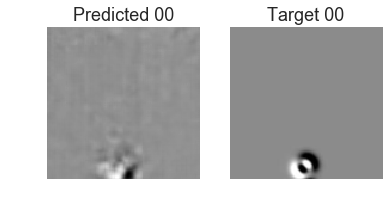

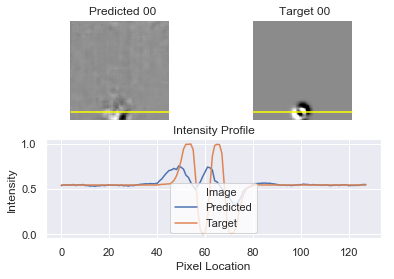

batch_num 0	future_frame_idx 1	type Propagate
torch.Size([16, 2, 128, 128]) torch.Size([16, 2, 128, 128])


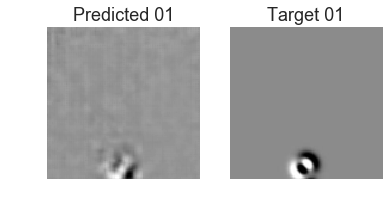

batch_num 0	future_frame_idx 2	type Propagate
torch.Size([16, 3, 128, 128]) torch.Size([16, 3, 128, 128])


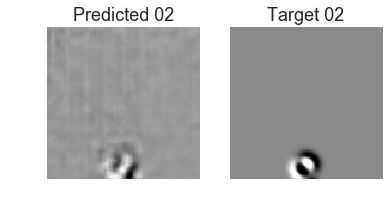

batch_num 0	future_frame_idx 3	type Propagate
torch.Size([16, 4, 128, 128]) torch.Size([16, 4, 128, 128])


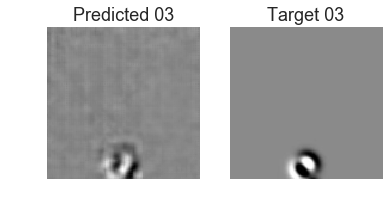

batch_num 0	future_frame_idx 4	type Propagate
torch.Size([16, 5, 128, 128]) torch.Size([16, 5, 128, 128])


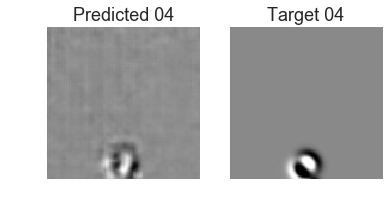

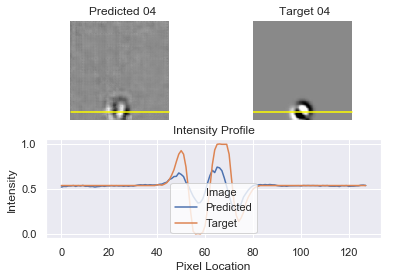

batch_num 0	future_frame_idx 5	type Propagate
torch.Size([16, 6, 128, 128]) torch.Size([16, 6, 128, 128])


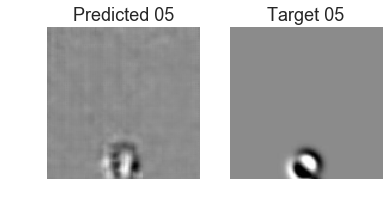

batch_num 0	future_frame_idx 6	type Propagate
torch.Size([16, 7, 128, 128]) torch.Size([16, 7, 128, 128])


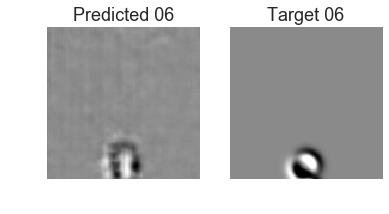

batch_num 0	future_frame_idx 7	type Propagate
torch.Size([16, 8, 128, 128]) torch.Size([16, 8, 128, 128])


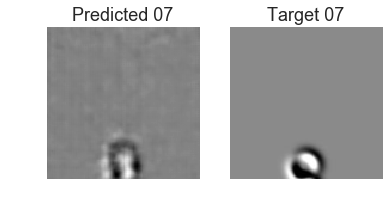

batch_num 0	future_frame_idx 8	type Propagate
torch.Size([16, 9, 128, 128]) torch.Size([16, 9, 128, 128])


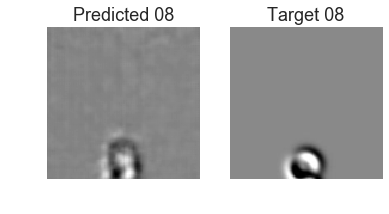

batch_num 0	future_frame_idx 9	type Reinsert
torch.Size([16, 10, 128, 128]) torch.Size([16, 10, 128, 128])


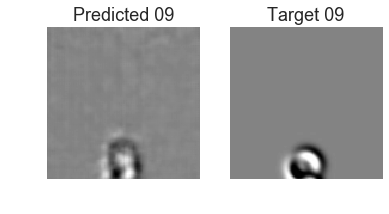

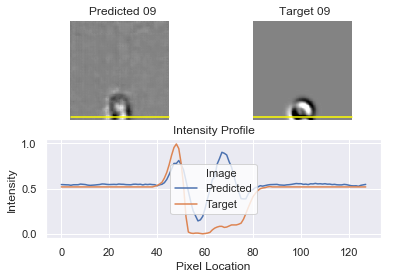

batch_num 0	future_frame_idx 10	type Propagate
torch.Size([16, 11, 128, 128]) torch.Size([16, 11, 128, 128])


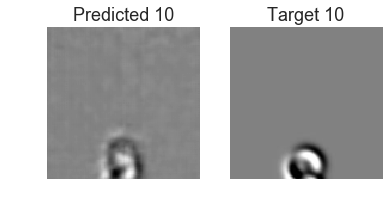

batch_num 0	future_frame_idx 11	type Propagate
torch.Size([16, 12, 128, 128]) torch.Size([16, 12, 128, 128])


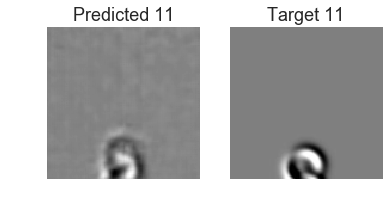

batch_num 0	future_frame_idx 12	type Propagate
torch.Size([16, 13, 128, 128]) torch.Size([16, 13, 128, 128])


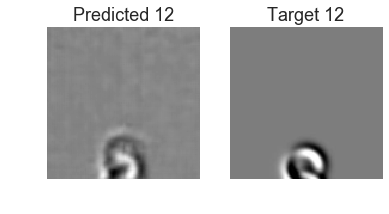

batch_num 0	future_frame_idx 13	type Propagate
torch.Size([16, 14, 128, 128]) torch.Size([16, 14, 128, 128])


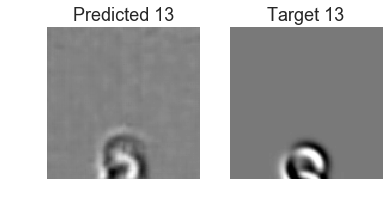

batch_num 0	future_frame_idx 14	type Propagate
torch.Size([16, 15, 128, 128]) torch.Size([16, 15, 128, 128])


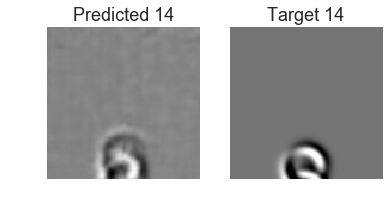

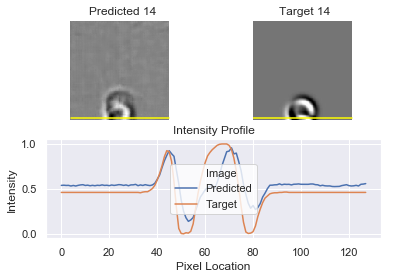

batch_num 0	future_frame_idx 15	type Propagate
torch.Size([16, 16, 128, 128]) torch.Size([16, 16, 128, 128])


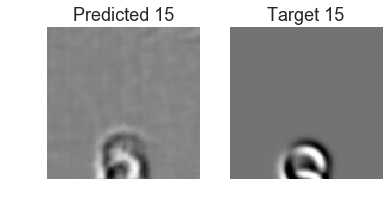

batch_num 0	future_frame_idx 16	type Propagate
torch.Size([16, 17, 128, 128]) torch.Size([16, 17, 128, 128])


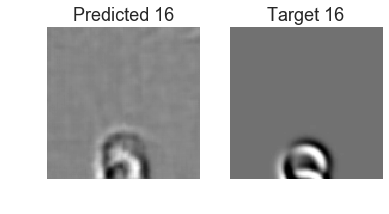

batch_num 0	future_frame_idx 17	type Propagate
torch.Size([16, 18, 128, 128]) torch.Size([16, 18, 128, 128])


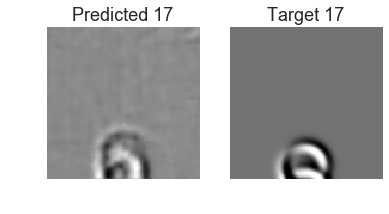

batch_num 0	future_frame_idx 18	type Propagate
torch.Size([16, 19, 128, 128]) torch.Size([16, 19, 128, 128])


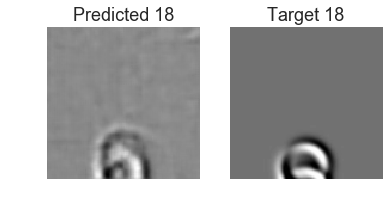

batch_num 0	future_frame_idx 19	type Reinsert
torch.Size([16, 20, 128, 128]) torch.Size([16, 20, 128, 128])


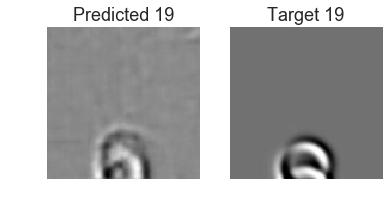

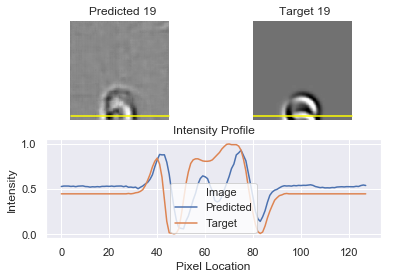

batch_num 0	future_frame_idx 20	type Propagate
torch.Size([16, 21, 128, 128]) torch.Size([16, 21, 128, 128])


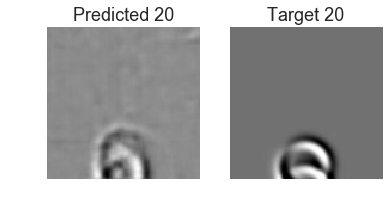

batch_num 0	future_frame_idx 21	type Propagate
torch.Size([16, 22, 128, 128]) torch.Size([16, 22, 128, 128])


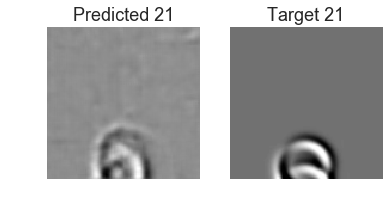

batch_num 0	future_frame_idx 22	type Propagate
torch.Size([16, 23, 128, 128]) torch.Size([16, 23, 128, 128])


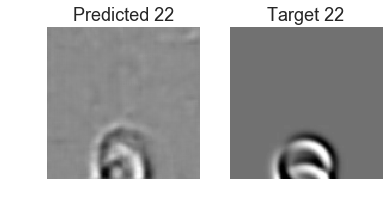

batch_num 0	future_frame_idx 23	type Propagate
torch.Size([16, 24, 128, 128]) torch.Size([16, 24, 128, 128])


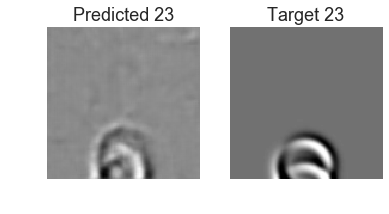

batch_num 0	future_frame_idx 24	type Propagate
torch.Size([16, 25, 128, 128]) torch.Size([16, 25, 128, 128])


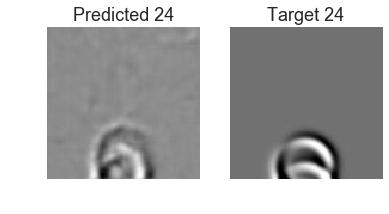

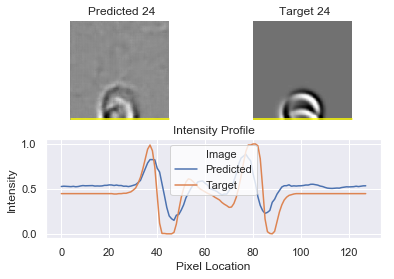

batch_num 0	future_frame_idx 25	type Propagate
torch.Size([16, 26, 128, 128]) torch.Size([16, 26, 128, 128])


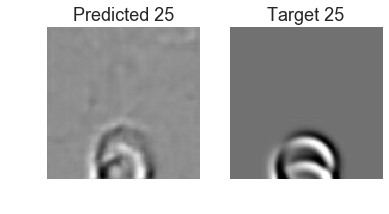

batch_num 0	future_frame_idx 26	type Propagate
torch.Size([16, 27, 128, 128]) torch.Size([16, 27, 128, 128])


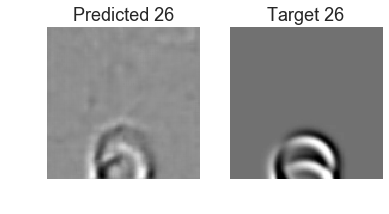

batch_num 0	future_frame_idx 27	type Propagate
torch.Size([16, 28, 128, 128]) torch.Size([16, 28, 128, 128])


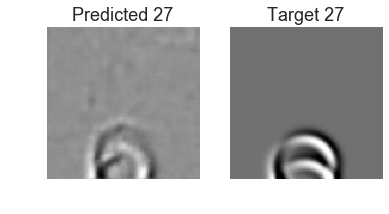

batch_num 0	future_frame_idx 28	type Propagate
torch.Size([16, 29, 128, 128]) torch.Size([16, 29, 128, 128])


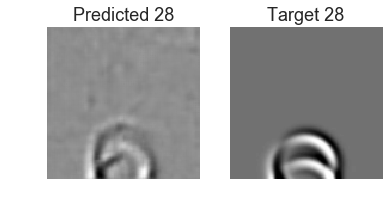

batch_num 0	future_frame_idx 29	type Reinsert
torch.Size([16, 30, 128, 128]) torch.Size([16, 30, 128, 128])


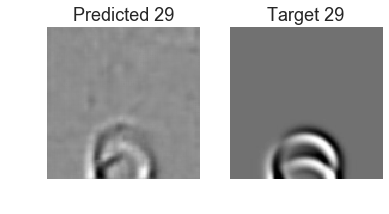

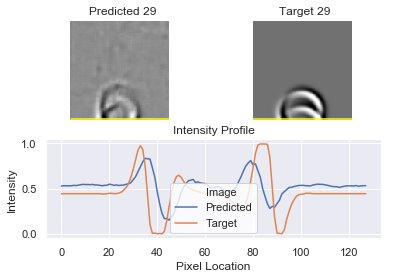

batch_num 0	future_frame_idx 30	type Propagate
torch.Size([16, 31, 128, 128]) torch.Size([16, 31, 128, 128])


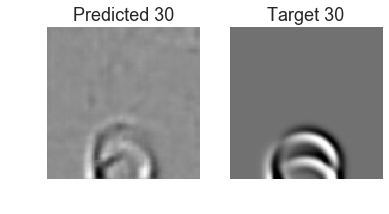

batch_num 0	future_frame_idx 31	type Propagate
torch.Size([16, 32, 128, 128]) torch.Size([16, 32, 128, 128])


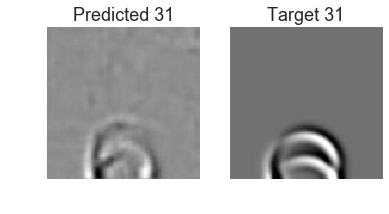

batch_num 0	future_frame_idx 32	type Propagate
torch.Size([16, 33, 128, 128]) torch.Size([16, 33, 128, 128])


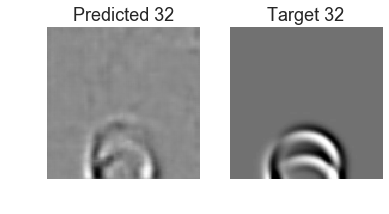

batch_num 0	future_frame_idx 33	type Propagate
torch.Size([16, 34, 128, 128]) torch.Size([16, 34, 128, 128])


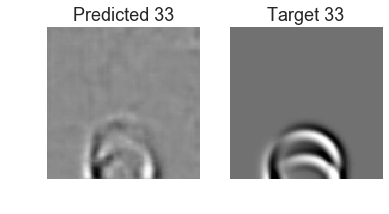

batch_num 0	future_frame_idx 34	type Propagate
torch.Size([16, 35, 128, 128]) torch.Size([16, 35, 128, 128])


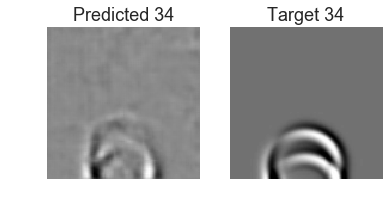

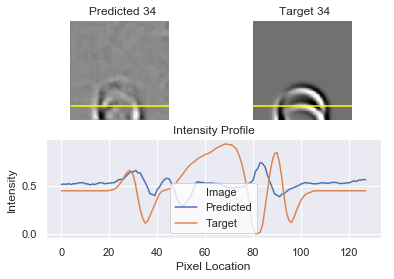

batch_num 0	future_frame_idx 35	type Propagate
torch.Size([16, 36, 128, 128]) torch.Size([16, 36, 128, 128])


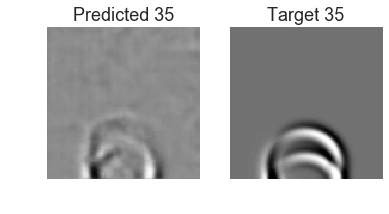

batch_num 0	future_frame_idx 36	type Propagate
torch.Size([16, 37, 128, 128]) torch.Size([16, 37, 128, 128])


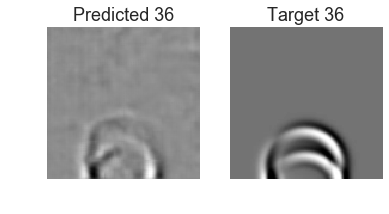

batch_num 0	future_frame_idx 37	type Propagate
torch.Size([16, 38, 128, 128]) torch.Size([16, 38, 128, 128])


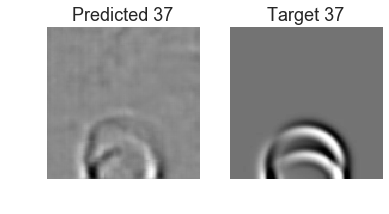

batch_num 0	future_frame_idx 38	type Propagate
torch.Size([16, 39, 128, 128]) torch.Size([16, 39, 128, 128])


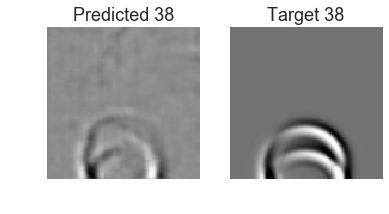

batch_num 0	future_frame_idx 39	type Reinsert
torch.Size([16, 40, 128, 128]) torch.Size([16, 40, 128, 128])


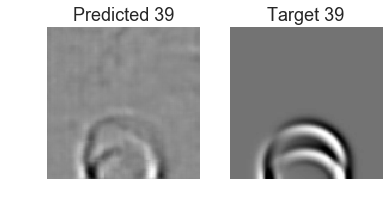

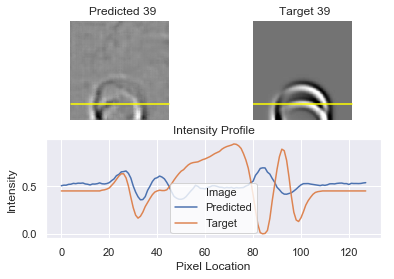

batch_num 0	future_frame_idx 40	type Propagate
torch.Size([16, 41, 128, 128]) torch.Size([16, 41, 128, 128])


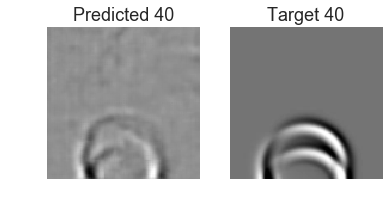

batch_num 0	future_frame_idx 41	type Propagate
torch.Size([16, 42, 128, 128]) torch.Size([16, 42, 128, 128])


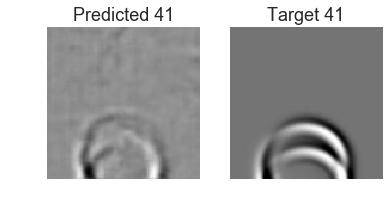

batch_num 0	future_frame_idx 42	type Propagate
torch.Size([16, 43, 128, 128]) torch.Size([16, 43, 128, 128])


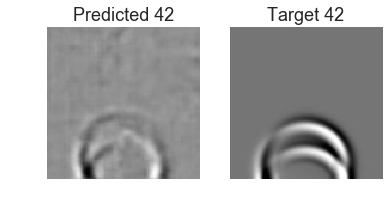

batch_num 0	future_frame_idx 43	type Propagate
torch.Size([16, 44, 128, 128]) torch.Size([16, 44, 128, 128])


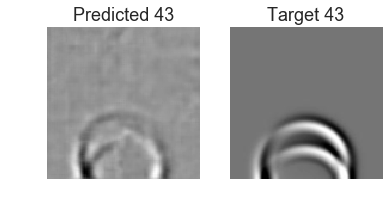

batch_num 0	future_frame_idx 44	type Propagate
torch.Size([16, 45, 128, 128]) torch.Size([16, 45, 128, 128])


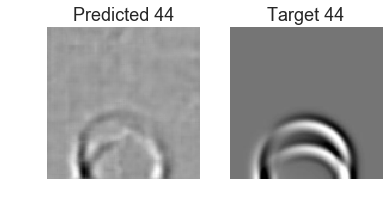

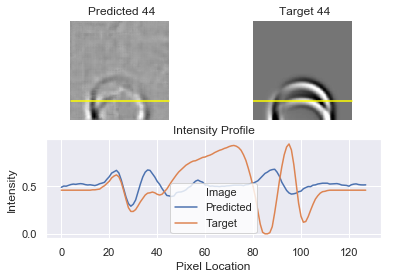

batch_num 0	future_frame_idx 45	type Propagate
torch.Size([16, 46, 128, 128]) torch.Size([16, 46, 128, 128])


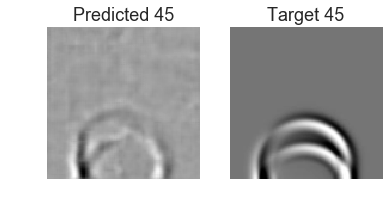

batch_num 0	future_frame_idx 46	type Propagate
torch.Size([16, 47, 128, 128]) torch.Size([16, 47, 128, 128])


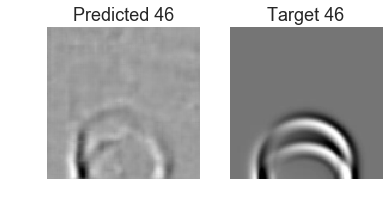

batch_num 0	future_frame_idx 47	type Propagate
torch.Size([16, 48, 128, 128]) torch.Size([16, 48, 128, 128])


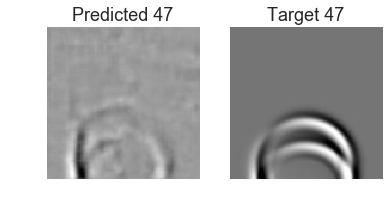

batch_num 0	future_frame_idx 48	type Propagate
torch.Size([16, 49, 128, 128]) torch.Size([16, 49, 128, 128])


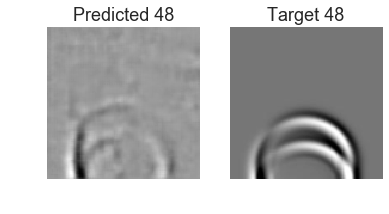

batch_num 0	future_frame_idx 49	type Reinsert
torch.Size([16, 50, 128, 128]) torch.Size([16, 50, 128, 128])


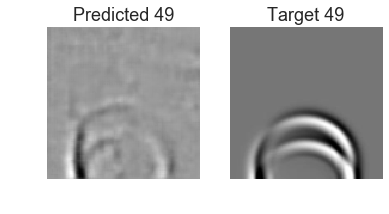

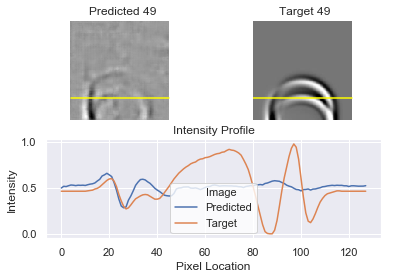

batch_num 0	future_frame_idx 50	type Propagate
torch.Size([16, 51, 128, 128]) torch.Size([16, 51, 128, 128])


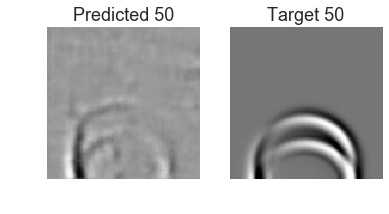

batch_num 0	future_frame_idx 51	type Propagate
torch.Size([16, 52, 128, 128]) torch.Size([16, 52, 128, 128])


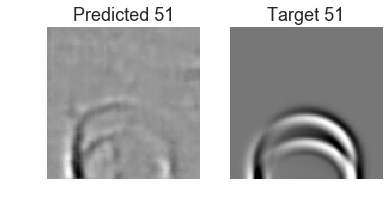

batch_num 0	future_frame_idx 52	type Propagate
torch.Size([16, 53, 128, 128]) torch.Size([16, 53, 128, 128])


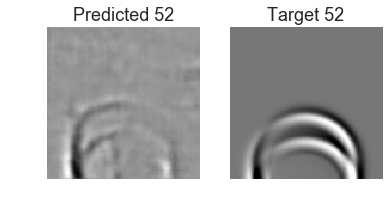

batch_num 0	future_frame_idx 53	type Propagate
torch.Size([16, 54, 128, 128]) torch.Size([16, 54, 128, 128])


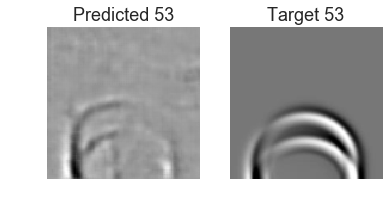

batch_num 0	future_frame_idx 54	type Propagate
torch.Size([16, 55, 128, 128]) torch.Size([16, 55, 128, 128])


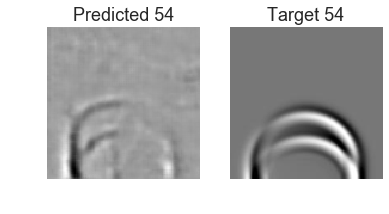

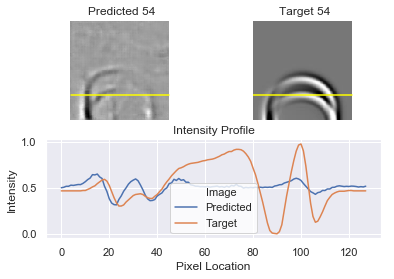

batch_num 0	future_frame_idx 55	type Propagate
torch.Size([16, 56, 128, 128]) torch.Size([16, 56, 128, 128])


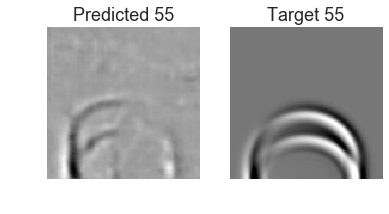

batch_num 0	future_frame_idx 56	type Propagate
torch.Size([16, 57, 128, 128]) torch.Size([16, 57, 128, 128])


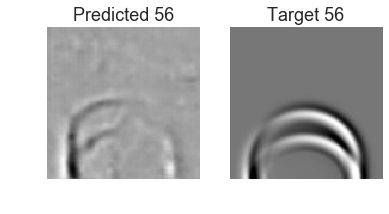

batch_num 0	future_frame_idx 57	type Propagate
torch.Size([16, 58, 128, 128]) torch.Size([16, 58, 128, 128])


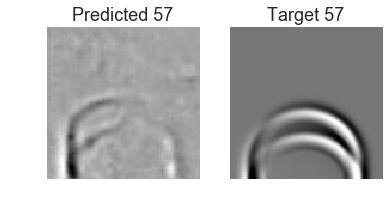

batch_num 0	future_frame_idx 58	type Propagate
torch.Size([16, 59, 128, 128]) torch.Size([16, 59, 128, 128])


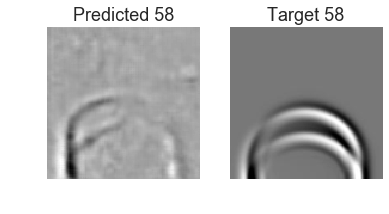

batch_num 0	future_frame_idx 59	type Reinsert
torch.Size([16, 60, 128, 128]) torch.Size([16, 60, 128, 128])


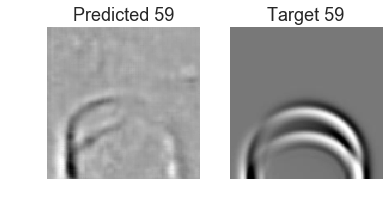

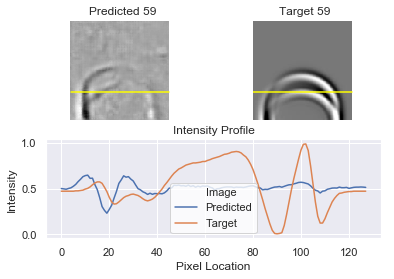

batch_num 0	future_frame_idx 60	type Propagate
torch.Size([16, 61, 128, 128]) torch.Size([16, 61, 128, 128])


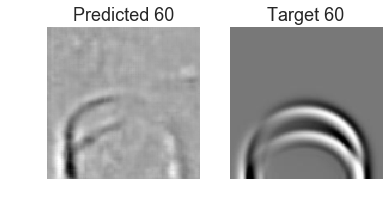

batch_num 0	future_frame_idx 61	type Propagate
torch.Size([16, 62, 128, 128]) torch.Size([16, 62, 128, 128])


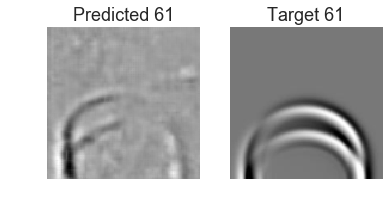

batch_num 0	future_frame_idx 62	type Propagate
torch.Size([16, 63, 128, 128]) torch.Size([16, 63, 128, 128])


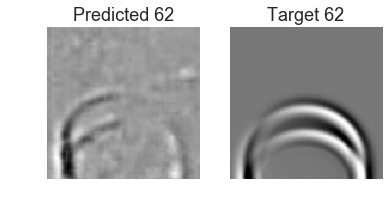

batch_num 0	future_frame_idx 63	type Propagate
torch.Size([16, 64, 128, 128]) torch.Size([16, 64, 128, 128])


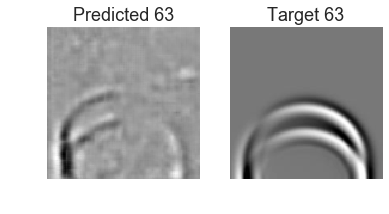

batch_num 0	future_frame_idx 64	type Propagate
torch.Size([16, 65, 128, 128]) torch.Size([16, 65, 128, 128])


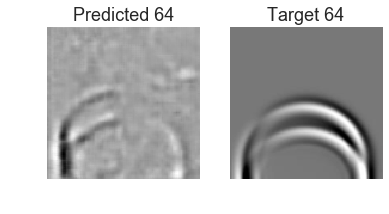

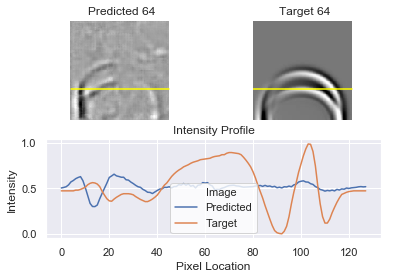

batch_num 0	future_frame_idx 65	type Propagate
torch.Size([16, 66, 128, 128]) torch.Size([16, 66, 128, 128])


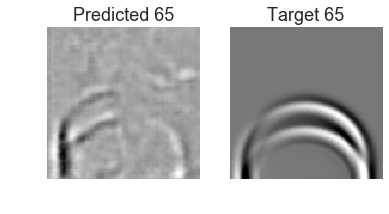

batch_num 0	future_frame_idx 66	type Propagate
torch.Size([16, 67, 128, 128]) torch.Size([16, 67, 128, 128])


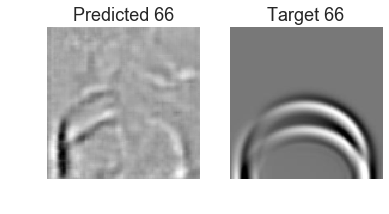

batch_num 0	future_frame_idx 67	type Propagate
torch.Size([16, 68, 128, 128]) torch.Size([16, 68, 128, 128])


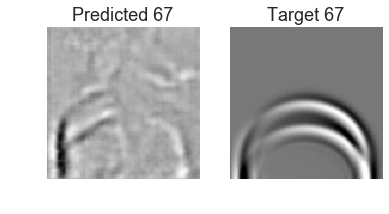

batch_num 0	future_frame_idx 68	type Propagate
torch.Size([16, 69, 128, 128]) torch.Size([16, 69, 128, 128])


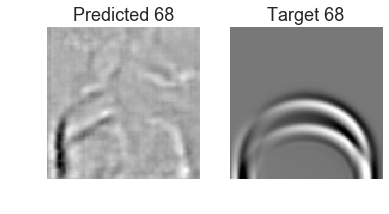

batch_num 0	future_frame_idx 69	type Reinsert
torch.Size([16, 70, 128, 128]) torch.Size([16, 70, 128, 128])


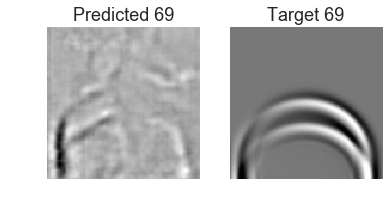

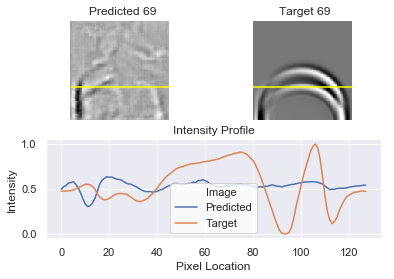

batch_num 0	future_frame_idx 70	type Propagate
torch.Size([16, 71, 128, 128]) torch.Size([16, 71, 128, 128])


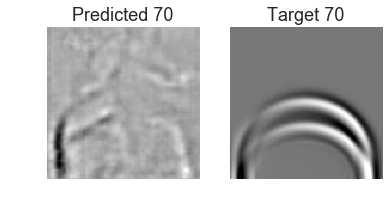

batch_num 0	future_frame_idx 71	type Propagate
torch.Size([16, 72, 128, 128]) torch.Size([16, 72, 128, 128])


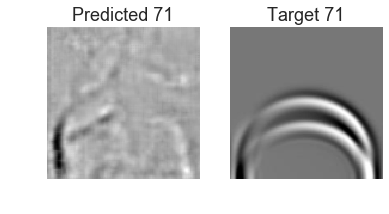

batch_num 0	future_frame_idx 72	type Propagate
torch.Size([16, 73, 128, 128]) torch.Size([16, 73, 128, 128])


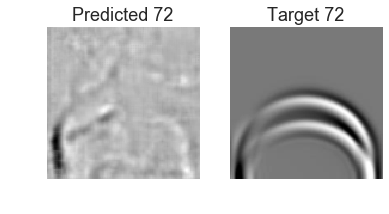

batch_num 0	future_frame_idx 73	type Propagate
torch.Size([16, 74, 128, 128]) torch.Size([16, 74, 128, 128])


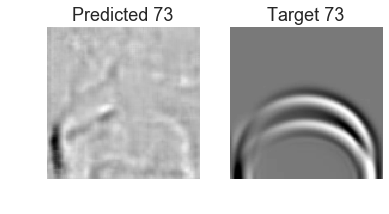

batch_num 0	future_frame_idx 74	type Propagate
torch.Size([16, 75, 128, 128]) torch.Size([16, 75, 128, 128])


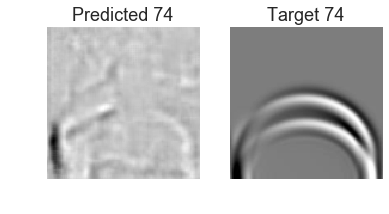

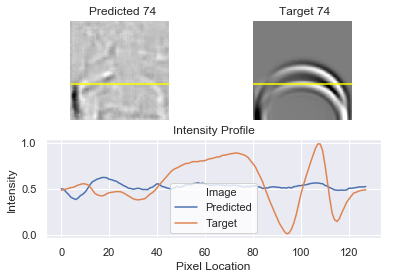

batch_num 0	future_frame_idx 75	type Propagate
torch.Size([16, 76, 128, 128]) torch.Size([16, 76, 128, 128])


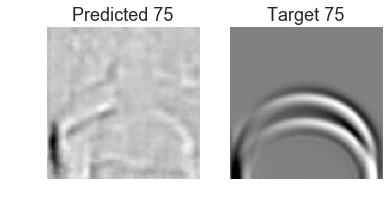

batch_num 0	future_frame_idx 76	type Propagate
torch.Size([16, 77, 128, 128]) torch.Size([16, 77, 128, 128])


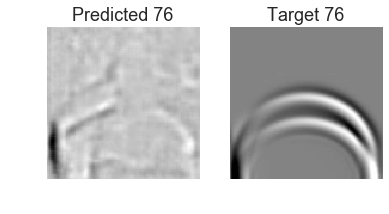

batch_num 0	future_frame_idx 77	type Propagate
torch.Size([16, 78, 128, 128]) torch.Size([16, 78, 128, 128])


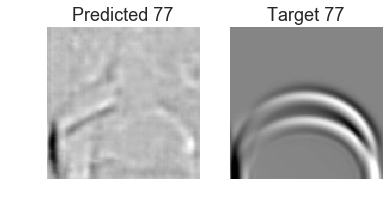

batch_num 0	future_frame_idx 78	type Propagate
torch.Size([16, 79, 128, 128]) torch.Size([16, 79, 128, 128])


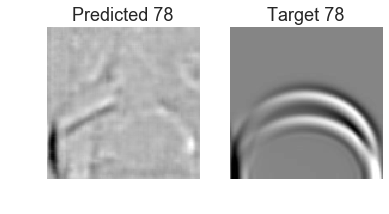

batch_num 0	future_frame_idx 79	type Reinsert
torch.Size([16, 80, 128, 128]) torch.Size([16, 80, 128, 128])


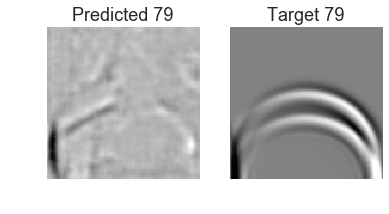

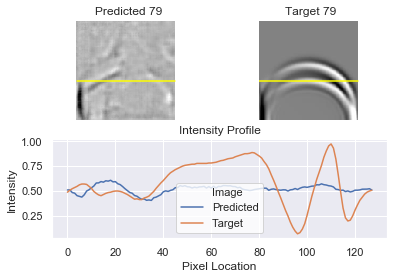

batch_num 0	future_frame_idx 80	type Propagate
torch.Size([16, 81, 128, 128]) torch.Size([16, 81, 128, 128])


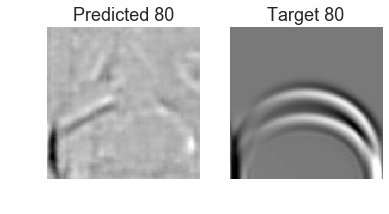

batch_num 0	future_frame_idx 81	type Propagate
torch.Size([16, 82, 128, 128]) torch.Size([16, 82, 128, 128])


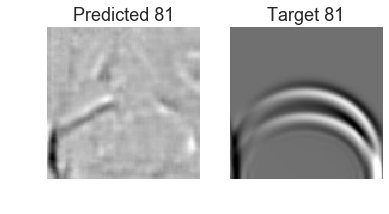

batch_num 0	future_frame_idx 82	type Propagate
torch.Size([16, 83, 128, 128]) torch.Size([16, 83, 128, 128])


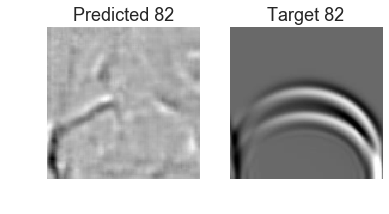

batch_num 0	future_frame_idx 83	type Propagate
torch.Size([16, 84, 128, 128]) torch.Size([16, 84, 128, 128])


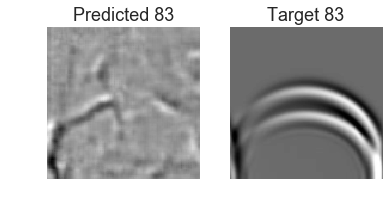

batch_num 0	future_frame_idx 84	type Propagate
torch.Size([16, 85, 128, 128]) torch.Size([16, 85, 128, 128])


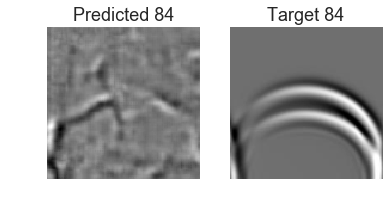

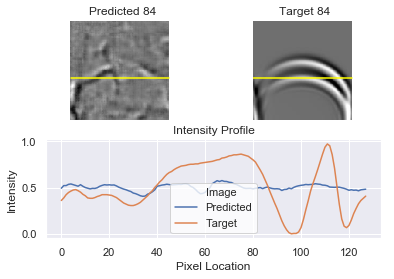

batch_num 0	future_frame_idx 85	type Propagate
torch.Size([16, 86, 128, 128]) torch.Size([16, 86, 128, 128])


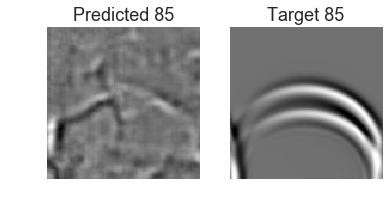

batch_num 0	future_frame_idx 86	type Propagate
torch.Size([16, 87, 128, 128]) torch.Size([16, 87, 128, 128])


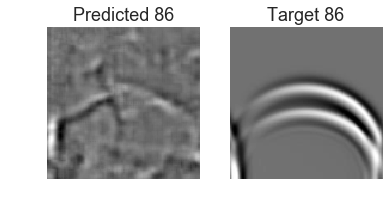

batch_num 0	future_frame_idx 87	type Propagate
torch.Size([16, 88, 128, 128]) torch.Size([16, 88, 128, 128])


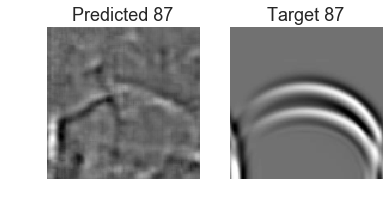

batch_num 0	future_frame_idx 88	type Propagate
torch.Size([16, 89, 128, 128]) torch.Size([16, 89, 128, 128])


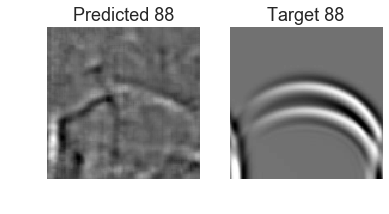

batch_num 0	future_frame_idx 89	type Reinsert
torch.Size([16, 90, 128, 128]) torch.Size([16, 90, 128, 128])


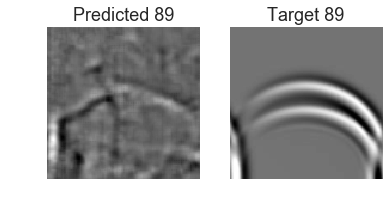

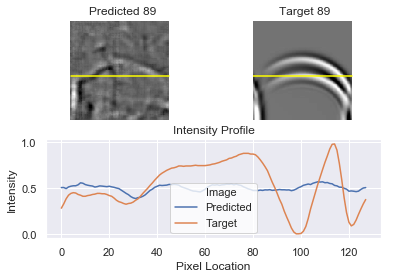

batch_num 0	future_frame_idx 90	type Propagate
torch.Size([16, 91, 128, 128]) torch.Size([16, 91, 128, 128])


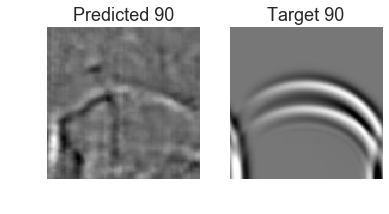

batch_num 0	future_frame_idx 91	type Propagate
torch.Size([16, 92, 128, 128]) torch.Size([16, 92, 128, 128])


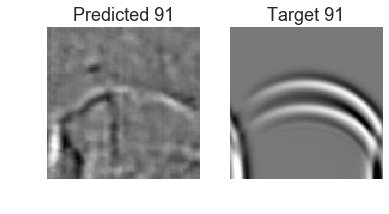

batch_num 0	future_frame_idx 92	type Propagate
torch.Size([16, 93, 128, 128]) torch.Size([16, 93, 128, 128])


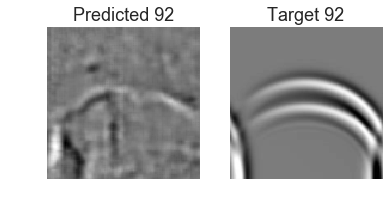

batch_num 0	future_frame_idx 93	type Propagate
torch.Size([16, 94, 128, 128]) torch.Size([16, 94, 128, 128])


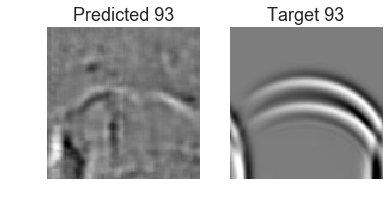

batch_num 0	future_frame_idx 94	type Propagate
torch.Size([16, 95, 128, 128]) torch.Size([16, 95, 128, 128])


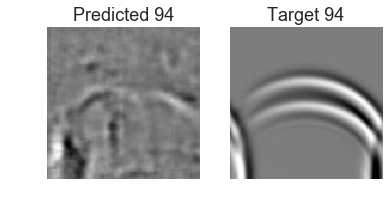

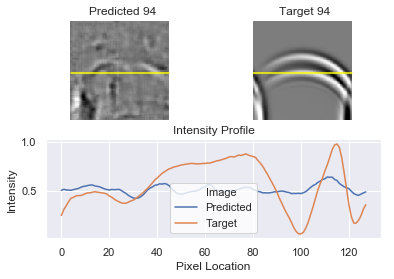

1 out of 31


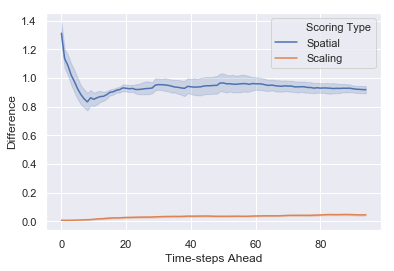

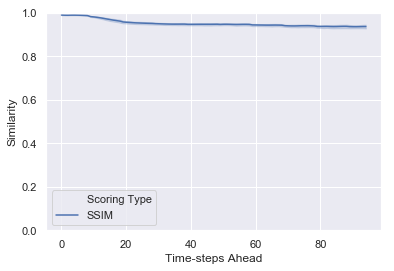

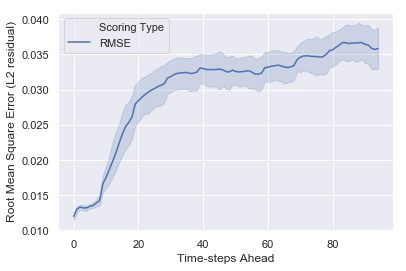

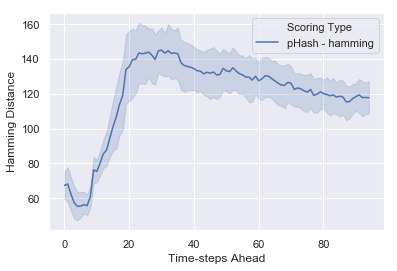

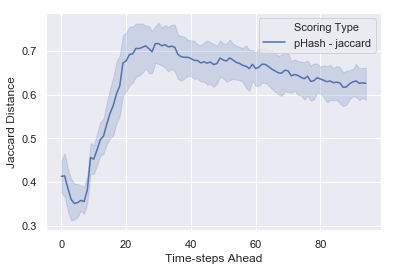

In [23]:
seed_everything(seed=12345)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=1)
starting_point = 0
score_keeper=Scorekeeper()
plot=True
debug=True

test(model, test_dataloader, starting_point, num_input_frames, num_output_frames, 
     channels, device, score_keeper, results_dir, plot=plot, debug=debug)
score_keeper.plot(results_dir)

In [ ]:
# seed_everything(seed=12345)
# test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=1)
# starting_point = 0
# score_keeper=Scorekeeper()
# plot=False
# debug=True

# test(model, test_dataloader, starting_point, num_input_frames, num_output_frames, 
#      channels, device, score_keeper, results_dir, plot=plot, debug=debug)
# score_keeper.plot(results_dir)

In [24]:
results_dir

'./Results/7_kernel_3LSTM_v010/'

In [29]:
figure_save(results_dir+'test/dokimi.png', plt.figure())

<Figure size 432x288 with 0 Axes>

In [28]:
mkdir Results/7_kernel_3LSTM_v010/test